In [11]:
import xarray as xr
import numpy as np 
import torch 

In [12]:
file_path = f"../data/raw/Tmax_20010101_20240320_BR-DWGD_UFES_UTEXAS_v_3.2.3.nc"
cur_df = xr.open_dataset(file_path, engine="netcdf4")

In [ ]:
lat_min, lat_max = -25.0, -19.5
lon_min, lon_max = -53.0, -44.0
cropped = cur_df.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

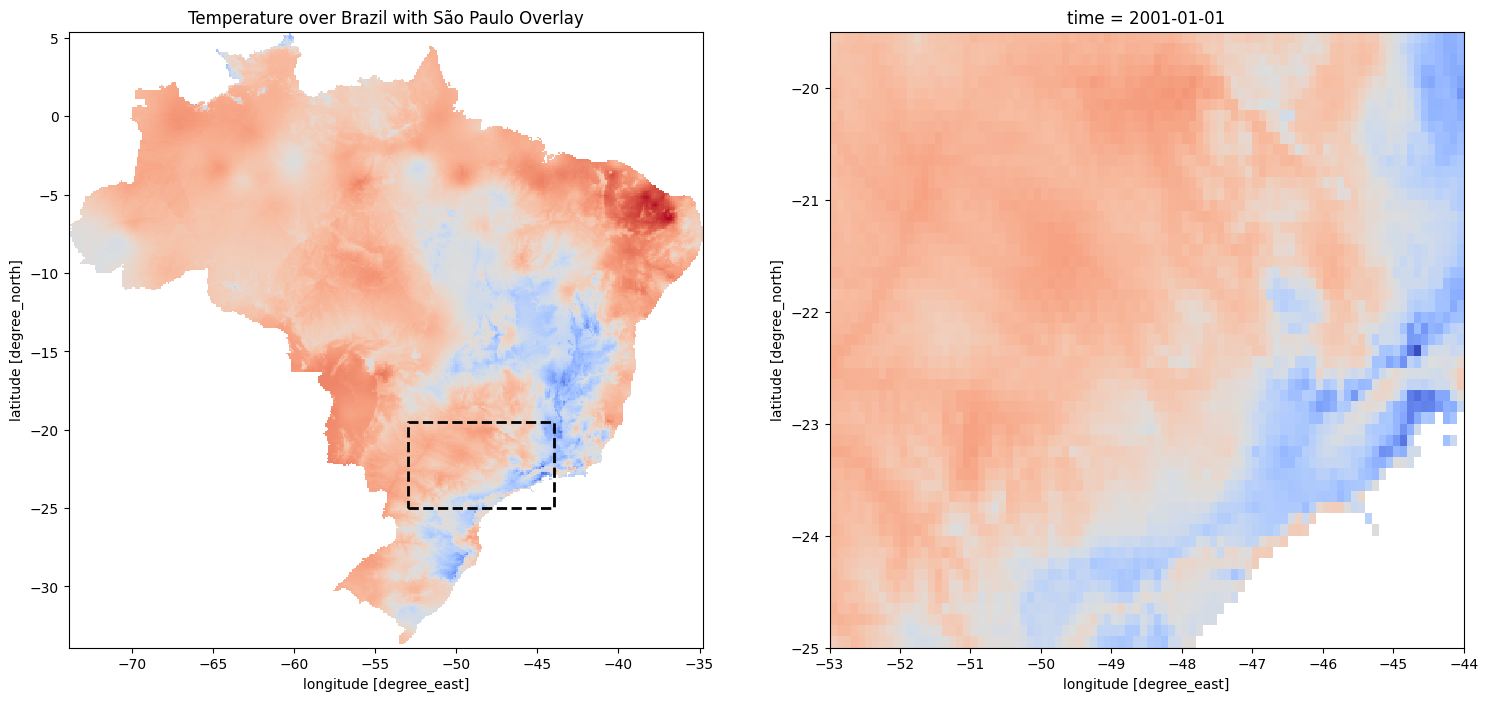

In [32]:
import matplotlib.pyplot as plt

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 8))


# Background: Full Brazil
cur_df.Tmax.isel(time=0).plot(ax=axs[0], cmap='coolwarm', add_colorbar=False)
cropped.Tmax.isel(time=0).plot(ax=axs[1], cmap='coolwarm', add_colorbar=False,vmin=cur_df.Tmax.isel(time=0).min(), vmax=cur_df.Tmax.isel(time=0).max())

# Overlay: São Paulo (as contour or colormap)

# Optional: Draw bounding box
axs[0].plot([lon_min, lon_max, lon_max, lon_min, lon_min],
        [lat_min, lat_min, lat_max, lat_max, lat_min],
        color='black', linewidth=2, linestyle='--', label='São Paulo region')

# Final touches
axs[0].set_title("Temperature over Brazil with São Paulo Overlay")
plt.show()
